Results with Scaled Data:
          Method  Silhouette Score  Calinski-Harabasz  Davies-Bouldin
0       K-Means          0.479881         157.360153        0.789363
1  Hierarchical          0.446689         222.719164        0.803467
2    Mean Shift          0.581750         251.349339        0.593313

Results with PCA Data:
          Method  Silhouette Score  Calinski-Harabasz  Davies-Bouldin
0       K-Means          0.522791         180.975460        0.739126
1  Hierarchical          0.511060         286.328664        0.705430
2    Mean Shift          0.614520         283.005488        0.543999


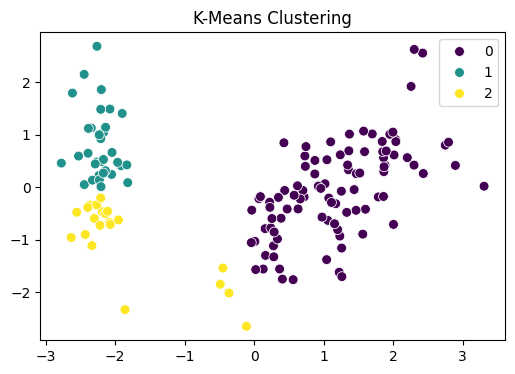

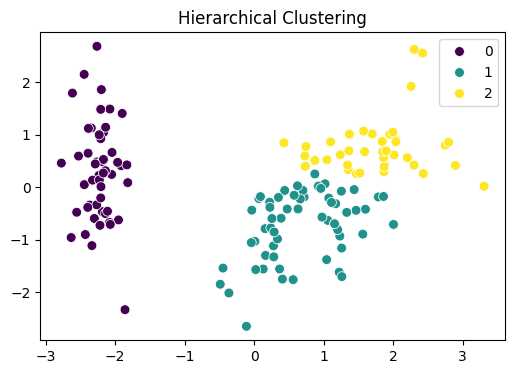

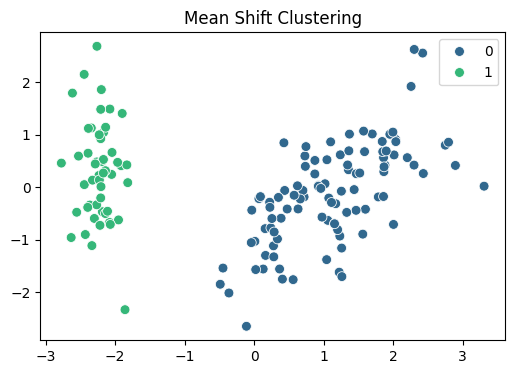

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.datasets import load_iris

# Load dataset (Iris dataset as an example from UCI)
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Applying PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Function to perform clustering and evaluate
def clustering_evaluation(X, n_clusters=3):
    results = []

    # K-Means Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(X)
    
    # Hierarchical Clustering
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    hierarchical_labels = hierarchical.fit_predict(X)
    
    # Mean Shift Clustering
    mean_shift = MeanShift()
    mean_shift_labels = mean_shift.fit_predict(X)

    # Evaluate Clustering Performance
    for method, labels in zip(["K-Means", "Hierarchical", "Mean Shift"], 
                              [kmeans_labels, hierarchical_labels, mean_shift_labels]):
        silhouette = silhouette_score(X, labels)
        calinski_harabasz = calinski_harabasz_score(X, labels)
        davies_bouldin = davies_bouldin_score(X, labels)
        results.append([method, silhouette, calinski_harabasz, davies_bouldin])

    return pd.DataFrame(results, columns=["Method", "Silhouette Score", "Calinski-Harabasz", "Davies-Bouldin"])

# Evaluate with original and PCA-transformed data
df_results = clustering_evaluation(scaled_data)
df_results_pca = clustering_evaluation(pca_data)

print("Results with Scaled Data:\n", df_results)
print("\nResults with PCA Data:\n", df_results_pca)

# Visualization of Clusters
def plot_clusters(X, labels, title):
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels, palette="viridis", s=50)
    plt.title(title)
    plt.show()

# K-Means Visualization
plot_clusters(pca_data, KMeans(n_clusters=3, random_state=42).fit_predict(pca_data), "K-Means Clustering")

# Hierarchical Clustering Visualization
plot_clusters(pca_data, AgglomerativeClustering(n_clusters=3).fit_predict(pca_data), "Hierarchical Clustering")

# Mean Shift Visualization
plot_clusters(pca_data, MeanShift().fit_predict(pca_data), "Mean Shift Clustering")
